### Phase Portrait Classification

In [33]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import Matrix
import cv2
from scipy.optimize import least_squares
import sys

#### Generating Phase Portraits

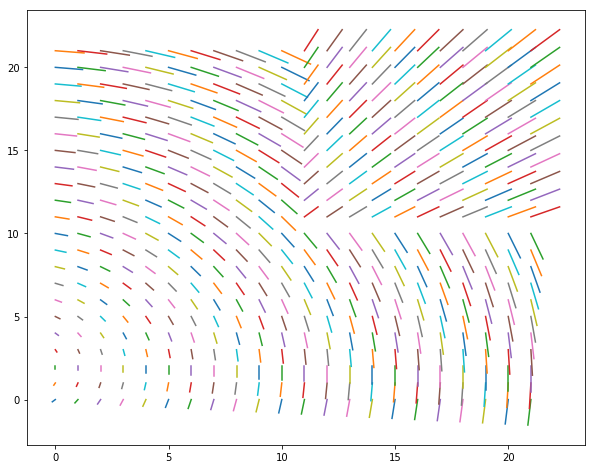

In [34]:
##Circle
#A= np.array([[0, 1],[-1,0]])
##Star
#A= np.array([[1, 0],[0,1]])
##Saddle
#A= np.array([[0, 1],[1,0]])
##Spiral
#A= np.array([[0, 1],[-1,-1]])
##Node
#A= np.array([[-4, -2],[-2,-4]])

## Window Size
w_size = 11

#To change Image scale
Im_size = 1

N = 11 * Im_size
# N=11


X_dash =  np.zeros((N*2,N*2,2))
# b = np.random.randn()
# print b


# To generate different flows in different sections of the image
A= np.array([[0, 1],[-1,0]])
b = [-2,-2]
for i in range (0,N) :
    for j in range (0,N) :
        pos = np.array([i,j]).T
#         b = 0 #np.random.randn() 
        X_dash[i,j,0]=A[0].dot(pos) + b[0]
        X_dash[i,j,1]=A[1].dot(pos) + b[1]
        

        
# b = [-6,6]        
# A= np.array([[0, 1],[-1,0]])
for i in range (0,N) :
    for j in range (N,2*N) :
        pos = np.array([i,j]).T
#         b = 0 #np.random.randn() 
        X_dash[i,j,0]=A[0].dot(pos) + b[0]
        X_dash[i,j,1]=A[1].dot(pos) + b[1]
        
        
# b = [-35,35]        
# A= np.array([[0, 1],[-1,0]])
for i in range (N,2*N) :
    for j in range (0,N) :
        pos = np.array([i,j]).T
#         b = 0 #np.random.randn() 
        X_dash[i,j,0]=A[0].dot(pos) + b[0]
        X_dash[i,j,1]=A[1].dot(pos) + b[1]
        

# b = [-15,15]        
A= np.array([[1, 0],[0,1]])
for i in range (N,2*N) :
    for j in range (N,2*N) :
        pos = np.array([i,j]).T
#         b = 0 #np.random.randn() 
        X_dash[i,j,0]=A[0].dot(pos) + b[0]
        X_dash[i,j,1]=A[1].dot(pos) + b[1]
        

#Image flow        
# X_dash = flow_sub        
        
# print X_dash 
fig = plt.figure(figsize=(10,8))
for x in range(0,2*N):
    for y in range(0,2*N):
        plt.plot([x,x+X_dash[x,y,0]/15],[y,y+X_dash[x,y,1]/15],'-')

fixed_map = np.zeros((N*2,N*2))
# plt.plot(-b[0],-b[1],'*')

#### Manual entry for 3x3

In [8]:
# flow_man  = np.array([[[0.0000001, 0.00000001],[0.0000001,-0.2],[0.000000001,-0.2]],[[-0.2,0.0000001], \
#                                                                [-0.2, -0.2], [-0.1, -0.4]],[[ -0.2,0.000000001],[-0.4, -0.1],[-0.2, -0.2]]])
# flow_man = X_dash[-10:0,-10:0,:] +0.00001
# flow_man

#### Dominant Orientation

In [52]:


def dominant_orientation(): 
    N =11
    r_1 =np.zeros((N,N))
    r_2 = np.zeros((N,N))
    theta_1 = np.zeros((N,N))
    theta_sin = np.zeros((N,N))
    theta_cos = np.zeros((N,N))
     
    for i in range (0,N):
        for j in range (0,N):
            pos = np.array([i,j]).T
            
            r_1[i,j] = np.sqrt(flow1[i][j][0]**2+flow1[i][j][1]**2)
            theta_1 [i,j]= np.arctan(flow1[i][j][1]/flow1[i][j][0])
            theta_sin[i,j] = (r_1[i,j]**2)*np.sin(2*theta_1[i,j])
            theta_cos[i,j] = (r_1[i,j]**2)*np.cos(2*theta_1[i,j])
            
    dom_theta= (np.arctan(np.sum(flow1[:,:,1])/np.sum(flow1[:,:,0])))
    dom_r_1= r_1[N/2,N/2] * np.sum(np.linalg.norm(r_1*np.cos((dom_theta-theta_1))))/np.sum((r_1))
#     print dom_r_1
#     print dom_theta 
    
    return dom_r_1,dom_theta

#### Classifying Section of Phase Portrait

In [128]:
## Different Quadrants
# flow_man = X_dash[0:11,-11:,:] +0.00001
# flow_man = X_dash[0:11,0:11,:] +0.00001
#flow_man = X_dash[-11:,0:11,:] +0.00001
#flow_man = X_dash[-11:,-11:,:] +0.00001

# a[0:11,0:11] = a[0:11,0:11]*2
# a[0:11,-11:] = a[0:11,-11:]*1
# a[-11:,0:11] = a[-11:,0:11]*3
# a[-11:,-11:] = a[-11:,-11:]*4

# flow1 = flow_man                         #+ 0.0000001 #np.ones(((5,5,2)))*0.05
# print flow1
# fig =plt.figure(figsize=(20,10))
plt_id =0
w_size = 11
# fixed_map = np.zeros((22,22))

n_windows= (N*2)/w_size
domin_r_1 = []
domin_theta_1 =[]

flow_x = np.shape(X_dash)[0]
flow_y = np.shape(X_dash)[1]


n_windows_x = flow_x/w_size
n_windows_y = flow_y/w_size
print n_windows_x
print n_windows_y

dom_image = np.zeros((n_windows_x,n_windows_y,2))

for xx in range(0,n_windows_x):
    for yy in range(0,n_windows_y):
#         xx=1
#         yy =1
        if 11+xx*11>flow_x or 11+yy*11 > flow_y:
            print 'hit limit'
            break
        else:
            flow_man = X_dash[0+xx*11:11+xx*11,0+yy*11:11+yy*11,:] +0.00001
            flow1 = flow_man
            plt_id+=1
#             plt.subplot(n_windows_x,n_windows_y,plt_id)
            dr,dt1  = dominant_orientation()
            domin_r_1.append(dr)
            domin_theta_1.append(dt1)
#             dom_image[xx,yy,0] = dr*np.cos(dt1)
#             dom_image[xx,yy,1] = dr*np.sin(dt1)
            
#             print flow_man[w_size/2,w_size/2,0]
            flow_man[w_size/2,w_size/2,0] = (dr*np.cos(dt1))
#             print flow_man[w_size/2,w_size/2,0]
            flow_man[w_size/2,w_size/2,1] = (dr*np.sin((dt1)))
            dom_image[xx,yy,0] = flow_man[w_size/2,w_size/2,0]
            dom_image[xx,yy,1] = flow_man[w_size/2,w_size/2,1]
            print xx,yy
#             for x in range(0,w_size):
#                 for y in range(0,w_size):
#                     if x==w_size/2 and y==w_size/2:
#                         plt.plot([x,x+flow_man[x,y,0]/1],[y,y+flow_man[x,y,1]/1],'r-')
#                     else:
#                         plt.plot([x,x+flow_man[x,y,0]/16],[y,y+flow_man[x,y,1]/16],'g-')
# plt.show()

17
56
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38

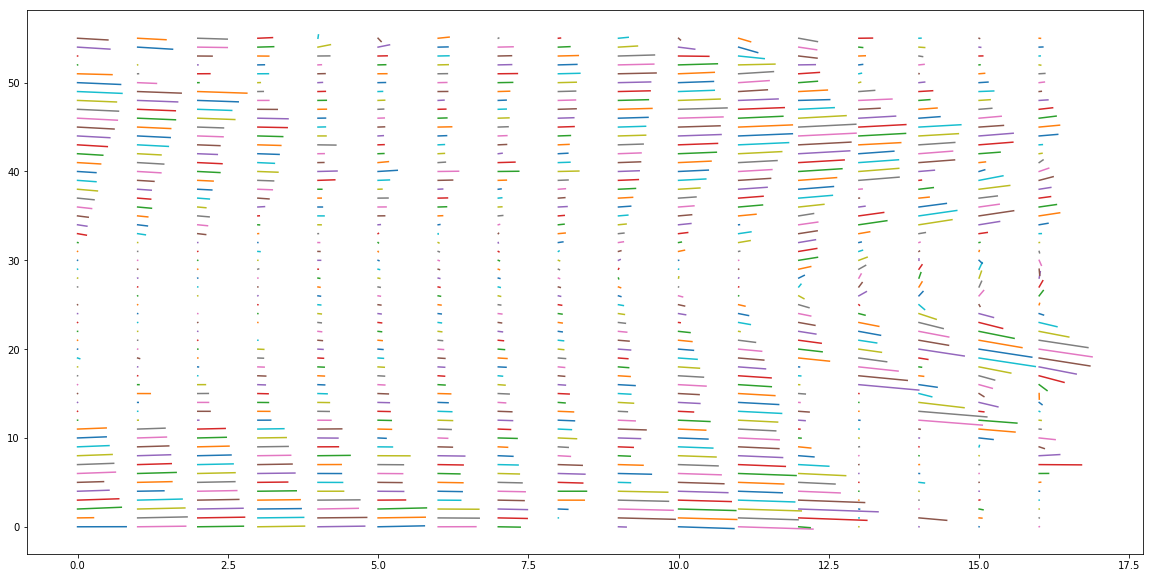

In [130]:
fig =plt.figure(figsize=(20,10))
for x in range(0,n_windows_x):
    for y in range(0,n_windows_y):
        plt.plot([x,x+dom_image[x,y,0]/3],[y,y+dom_image[x,y,1]/3],'-')

#### Target function to be minimized

In [131]:

def sum_of_areas(x0_in): 
    x0 = np.array([[x0_in[0],x0_in[1]],[x0_in[2],x0_in[3]],[x0_in[4],x0_in[5]]])
    N =11
    A_12 =  np.zeros((N,N))
    r_1 =np.zeros((N,N))
    r_2 = np.zeros((N,N))
    theta_1 = np.zeros((N,N))
    theta_2 = np.zeros((N,N))
    theta_sin = np.zeros((N,N))
    theta_cos = np.zeros((N,N))
    
    
    N=11
      
    for i in range (0,N):
        for j in range (0,N):
            pos = np.array([i,j]).T
            
            r_1[i,j] = np.sqrt(flow1[i][j][0]**2+flow1[i][j][1]**2)
            r_2[i,j] = np.sqrt((x0[0].dot(pos)+x0[2,0])**2+(x0[1].dot(pos)+x0[2,1])**2) #np.sqrt(flow1[0][0][0]**2+flow1[0][0][1]**2)
            #print r_1
            #print r_2
            theta_1 [i,j]= np.arctan(flow1[i][j][1]/flow1[i][j][0])
            theta_2[i,j] = np.arctan((x0[1].dot(pos)+x0[2,1])/(x0[0].dot(pos)+x0[2,0]))#np.arctan(flow1[0][0][1]/flow1[0][0][0])
            #print theta_1,theta_2
            theta_sin[i,j] = (r_1[i,j]**2)*np.sin(2*theta_1[i,j])
            theta_cos[i,j] = (r_1[i,j]**2)*np.cos(2*theta_1[i,j])
            
            
            A_12[i,j]= 0.5 *r_1[i,j]*r_2[i,j]* abs(np.sin(theta_1[i,j] - theta_2[i,j])) #abs((theta_1[i,j] - theta_2[i,j]))
    S = np.sum(A_12)
    #print S
    dom_theta = (np.arctan(np.sum(theta_sin)/np.sum(theta_cos))/2)
    dom_r_1=(r_1[N/2,N/2]*np.sum(abs(r_1*np.cos(dom_theta-theta_1)))/np.sum(r_1))
#     print dom_r_1
#     print dom_theta
    #S= x0_in**2
    return S
    #theta_1[0,0]









#### Finding  Eigen Values  and Fixed points by panning window across Image

In [135]:
node=1
saddle=2
star=3
improper=4
center=5
spiral=6

# root1 = A_eig[0]
# root2 = A_eig[1]
# l_1 = J[0,0]
# l_2 = J[1,1]
# imp = J[0,1]
domin_r_1 = []
domin_theta_1 =[]
flow_x = np.shape(dom_image)[0]
flow_y = np.shape(dom_image)[1]


n_windows_x = flow_x/w_size
n_windows_y = flow_y/w_size
fit_map = np.zeros((flow_x,flow_y))



from scipy.optimize import least_squares
fit = np.zeros((n_windows_x,n_windows_y))
x_zerolist = [] #np.zeros((2,2))
fixed_map = np.zeros((flow_x,flow_y))
for xx in range(0,n_windows_x):
    for yy in range(0,n_windows_y):

        flow_man = X_dash[0+xx*11:11+xx*11,0+yy*11:11+yy*11,:] +0.00001
        flow1 = flow_man
#         x0_dummy = np.array([1.,1.,0.0000001,.0000001,0.00001,0.0000001])
        dr,dt1  = dominant_orientation()
        domin_r_1.append(dr)
        domin_theta_1.append(dt1)
        
        x0_sum_of_area = np.array([1.,1.,0.0000001,.0000001,0.00001,0.0000001])
        
        res_1 = least_squares(sum_of_areas, x0_sum_of_area)
        
        res_1.x
        A_final = np.array([[res_1.x[0],res_1.x[1]],[res_1.x[2],res_1.x[3]]])
        b_final =  np.array([[res_1.x[4]],[res_1.x[5]]])
        A_eig,v  = np.linalg.eig(A_final)
        A_eig
        b_final
        x_zero = -np.linalg.pinv(A_final).dot(b_final)
        m = Matrix(A_final)
        P, J = m.jordan_form()
        root1 = A_eig[0]
        root2 = A_eig[1]
        l_1 = J[0,0]
        l_2 = J[1,1]
        imp = J[0,1]
        if isinstance(root1,complex):
            alpha = root1.real
            if abs(alpha)<1e-2:
                phase= 'center'
                fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= center
            else:
                phase = 'spiral'
                fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= spiral
        elif ((abs(l_1) - abs(l_2))<= 1e-2 ): #and np.sign(l_1)==np.sign(l_2) ):
            if (1-imp)<0.1:
                phase = 'imroper'
                fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= improper
            else:
                phase = 'star'
                fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11] = star
#                 print fit_map

        elif(abs(abs(l_1)-abs(l_2))>1e-3):
            if (np.sign(l_1)==np.sign(l_2)):
                phase = 'node'
                fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= node
            else:
                phase = 'saddle'
                fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= saddle
        elif np.sign(l_1)!= np.sign(l_2):
            phase = 'saddle'
            fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]= saddle
        else:
            phase = 'none'
        
        #Calculating Fitness(closeness between predicted and actual)
        fit[xx,yy]=1 - sum_of_areas(res_1.x)/(N**2/2)
        
        x_zero1 = (np.around(x_zero))
        x_zero1 = x_zero1.astype(int)
        if x_zero1[0]+xx*11>N*2 or x_zero1[0]+xx*11 <0 or x_zero1[1]+yy*11> N*2 or x_zero1[1]+yy*11<0:
#             x_zero_1[0] = 0
#             x_zero1[1] = 0
#             fixed_map[x_zero1[0]+xx*11,x_zero1[1]+yy*11]= fit[xx,yy]
            pass
        else:
            x_zerolist.append(x_zero1)
            print phase,fit[xx,yy],x_zero1, A_eig
            fixed_map[x_zero1[0]+xx*11,x_zero1[1]+yy*11]= fit[xx,yy]
        

print np.shape(x_zero1)


star 0.7184820613148917 [[5]
 [9]] [0.05365486 0.01235014]
star -1.2017095280942778 [[15]
 [-6]] [0.29436264 0.0575332 ]
(2, 1)


#### Segmenting Image by type of flow:

[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3.

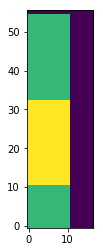

In [136]:
# fit_map[0:11,0:11]=2
# fit_map[11:22,11:22]=6
# fit_map[0:11,11:22]=6
# fit_map[11:22,0:11] = 2
np.set_printoptions(threshold=np.nan)
fit_map=fit_map.T
print fit_map
plt.imshow(fit_map,origin='lower')

#### Visulaizing Fixed Points with likelihood values(proportional to the fit)

Text(0.5,1,u'Fixed Point Map')

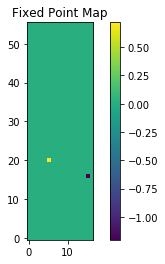

In [137]:
fixed_map =fixed_map.T
# fixed_map = np.around(fixed_map)
# fixed_map = fixed_map.clip(min=0)
# plt.scatter(x,y,s= fixed_map,alpha =0.5)
plt.imshow(fixed_map,origin='lower')
plt.colorbar(orientation='vertical')
plt.title('Fixed Point Map')
# print fixed_map




#### Critical points

In [63]:
# fixed_map_1 = fixed_map.clip(min=0)
# fixed_map_1 = np.around(fixed_map_1)
# indx = np.nonzero(fixed_map_1)
# print indx
# x_fin,y_fin = sum(indx[0])/len(indx[0]), sum(indx[1])/len(indx[1])
# # x_fin,y_fin = sum(indx)/len(indx)
# fixed_map_1[x_fin,y_fin] = 0.
# print x_fin,y_fin
# plt.plot(y_fin,x_fin,'*',label = 'Centroid')

# plt.imshow(fixed_map_1,origin='lower')
# plt.colorbar(orientation='vertical')
# plt.title('Fixed Point Map')
# plt.legend()

#### Taking Centroids of Critical/Fixed points within regions of similar flow

In [138]:
#preprocessing - run once
fixed_map = fixed_map.T
fit_map_1= fit_map
fit_map_gray = fit_map_1 * 40

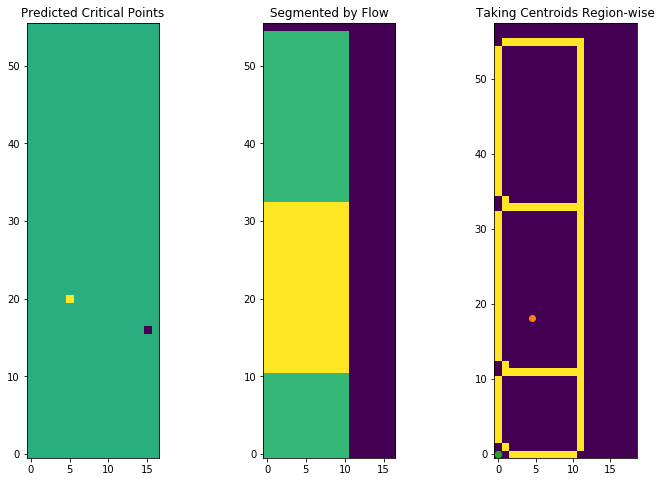

In [139]:
fig = plt.figure(figsize=(12,8))
   

img = cv2.imread('first.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


fixed_map_1 = fixed_map.clip(min=0.)
fixed_map_1 = np.around(fixed_map_1)
indx = np.nonzero(fixed_map_1)
plt.subplot(1,3,1)
plt.imshow(fixed_map.T,origin='lower')
plt.title('Predicted Critical Points')

plt.subplot(1,3,2)
plt.title('Segmented by Flow')
plt.imshow(fit_map,origin='lower')


fit_map_1= fit_map
plt.subplot(1,3,3)
fit_map_gray_Copy = np.uint8(fit_map_gray)
plt.title('Taking Centroids Region-wise')

fit_map_gray_Copy = np.pad(fit_map_gray_Copy, pad_width=1, mode='constant', constant_values=0)
edged = cv2.Canny(fit_map_gray_Copy, 90, 115)
edged1=edged

imagecnt,contours,hierarchy= cv2.findContours(edged1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(imagecnt,origin='lower')
centroid_x=np.zeros((len(contours)-1,1))
centroid_y = np.zeros((len(contours)-1,1))
no_contours = np.arange(len(contours))
covered =[]


for i in (reversed(no_contours)):
    if i > 0:
        cnt = contours[i]
        counts = 0.1
        for j in range (len(indx[0])):
            if j not in covered:
                test = cv2.pointPolygonTest(cnt,(indx[0][j],indx[1][j]),False)

                if test == 1 :
                    
#                     print 'coveredd!',indx[0][j],indx[1][j]
                    covered.append(j)
                    counts+=1

                    centroid_x[-i],centroid_y[-i]= indx[0][j]+centroid_x[-i] , indx[1][j]+centroid_y[-i] 
                elif test == 0:
                    pass
#                     print 'on border!'

        centroid_x[-i], centroid_y[-i] = centroid_x[-i]/counts,centroid_y[-i]/counts

        plt.plot(centroid_x[-i],centroid_y[-i],'o')

        
        

#### Visualizing Critical Points

Text(0.5,1,u'Multiple Critical Points')

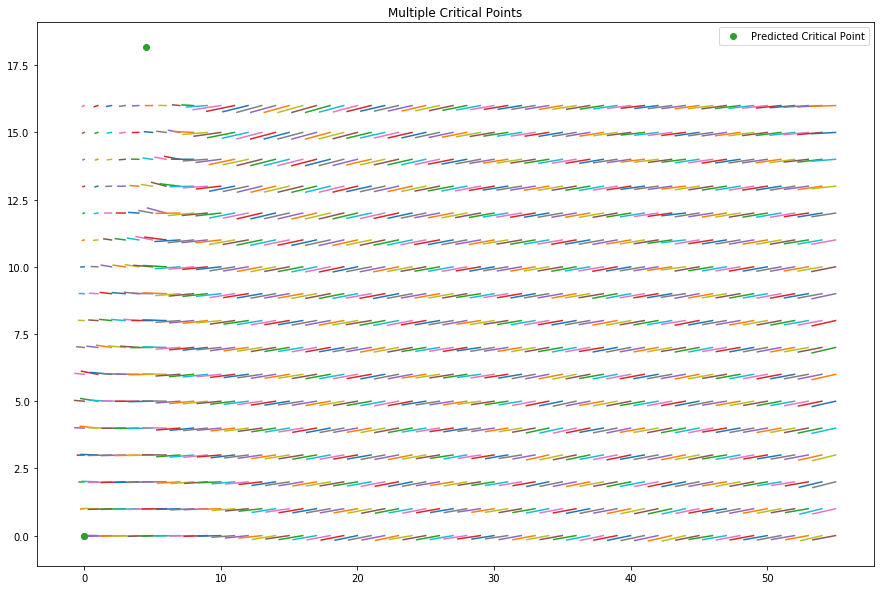

In [141]:
fig = plt.figure(figsize=(15,10))

for x in range(0,flow_y):
    for y in range(0,flow_x):
        plt.plot([x,x+X_dash[x,y,0]/15],[y,y+X_dash[x,y,1]/15],'-')
plt.plot(centroid_x,centroid_y,'o',label='Predicted Critical Point')
plt.legend()
plt.title('Multiple Critical Points')

In [9]:
# cap = cv2.VideoCapture();
# windowName = "Dense Optic Flow";
# cv2.namedWindow(windowName, cv2.WINDOW_NORMAL);
# keep_processing = True;
# camera_to_use = 0; 
# if (cap.isOpened):
#     ret, frame = cap.read();
# prevgray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# while (keep_processing):

#     # if video file successfully open then read frame from video

#     if (cap.isOpened):
#         ret, frame = cap.read();

#         # when we reach the end of the video (file) exit cleanly

#         if (ret == 0):
#             keep_processing = False;
#             continue;

#     # convert image to grayscale
#     frame = np.uint8(frame)
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # compute dense optic flow using technique of Farneback 2003
#     # parameters from example (OpenCV 3.2):
#     # https://github.com/opencv/opencv/blob/master/samples/python/opt_flow.py

#     flow = cv2.calcOpticalFlowFarneback(prevgray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
#     #print flow
#     prevgray = gray

#     # display image with optic flow overlay

#     cv2.imshow(windowName, draw_flow(gray, flow))

#     # start the event loop - essential

#     # cv2.waitKey() is a keyboard binding function (argument is the time in milliseconds).
#     # It waits for specified milliseconds for any keyboard event.
#     # If you press any key in that time, the program continues.
#     # If 0 is passed, it waits indefinitely for a key stroke.
#     # (bitwise and with 0xFF to extract least significant byte of multi-byte response)

#     key = cv2.waitKey(40) & 0xFF; # wait 40ms (i.e. 1000ms / 25 fps = 40 ms)

#     # It can also be set to detect specific key strokes by recording which key is pressed

#     # e.g. if user presses "x" then exit

#     if (key == ord('x')):

#         keep_processing = False;

# # close all windows

# cv2.destroyAllWindows()


error: /tmp/binarydeb/ros-kinetic-opencv3-3.3.1/modules/imgproc/src/color.cpp:11111: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [114]:
#####################################################################

# Example : perform live visualization of optic flow from a video file
# specified on the command line (e.g. python FILE.py video_file) or from
# an attached web camera

# Author : Toby Breckon, toby.breckon@durham.ac.uk

# Copyright (c) 2017 School of Engineering & Computing Science,
#                    Durham University, UK
# License : LGPL - http://www.gnu.org/licenses/lgpl.html

#####################################################################

import cv2
import sys
import numpy as np
#np.set_printoptions(threshold=np.nan)
#####################################################################

keep_processing = True;
camera_to_use = 0; # 0 if you have one camera, 1 or > 1 otherwise

#####################################################################

# draw optic flow visualization on image using a given step size for
# the line glyphs that show the flow vectors on the image

def draw_flow(img, flow, step=8):
    h, w = img.shape[:2]
    #print img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
    #print np.shape(flow), np.shape(x), step
    fx, fy = flow[y,x].T
    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)
    #print lines[0][0][0]
#     print (np.shape(fx),np.shape(fy))

    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.polylines(vis, lines, 0, (0, 255, 0))
    for (x1, y1), (x2, y2) in lines:
        cv2.circle(vis, (x1, y1), 1, (0, 255, 0), -1)
        cv2.circle(vis, (240,320),5,(255,0,0),-1)
    return vis
    cv2.circle(vis, (240,320),1,(255,0,0),-1)

#####################################################################

# define video capture object

cap = cv2.VideoCapture();

# define display window name

windowName = "Dense Optic Flow"; # window name

# if command line arguments are provided try to read video_name
# otherwise default to capture from attached H/W camera

if (((len(sys.argv) == 2) and (cap.open(str(sys.argv[1]))))
    or (cap.open(camera_to_use))):
    cap.open('0002.avi')
    # create window by name (as resizable)

    cv2.namedWindow(windowName, cv2.WINDOW_NORMAL);

    # if video file successfully open then read an initial frame from video

    if (cap.isOpened):
        ret, frame = cap.read();

    # convert image to grayscale to be previous frame

    prevgray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    while (keep_processing):

        # if video file successfully open then read frame from video

        if (cap.isOpened):
            ret, frame = cap.read();

            # when we reach the end of the video (file) exit cleanly

            if (ret == 0):
                keep_processing = False;
                continue;

        # convert image to grayscale

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # compute dense optic flow using technique of Farneback 2003
        # parameters from example (OpenCV 3.2):
        # https://github.com/opencv/opencv/blob/master/samples/python/opt_flow.py

        flow = cv2.calcOpticalFlowFarneback(prevgray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        #print flow
        prevgray = gray

        # display image with optic flow overlay
        
        cv2.imshow(windowName, draw_flow(gray, flow))

        # start the event loop - essential

        # cv2.waitKey() is a keyboard binding function (argument is the time in milliseconds).
        # It waits for specified milliseconds for any keyboard event.
        # If you press any key in that time, the program continues.
        # If 0 is passed, it waits indefinitely for a key stroke.
        # (bitwise and with 0xFF to extract least significant byte of multi-byte response)

        key = cv2.waitKey(40) & 0xFF; # wait 40ms (i.e. 1000ms / 25 fps = 40 ms)

        # It can also be set to detect specific key strokes by recording which key is pressed

        # e.g. if user presses "x" then exit

        if (key == ord('x')):
            
            keep_processing = False;

    # close all windows

    #cv2.destroyAllWindows()

else:
    print("No video file specified or camera connected.");


In [125]:
print np.shape(flow)
h = 374
w = 1242
step = 5
y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
print len(y),len(x)
#print np.shape(flow), np.shape(x), step
fx, fy = flow[y,x].T
flow_sub = flow[y,x]
# flow_sub =  flow[::25,::35,:]
# flow_sub =  flow[::17,::57,:] #works_1
# flow_sub =  flow[::3,::10,:] #nice_1
flow_sub =  flow[::2,::2,:]
print np.shape(fx)
print np.shape(flow_sub)
X_dash = flow_sub

(374, 1242, 2)
18600 18600
(18600,)
(187, 621, 2)


In [127]:
import matplotlib.pyplot as plt
flow_x = np.shape(flow_sub)[0]
flow_y = np.shape(flow_sub)[1]
print flow_x
print flow_y
fig = plt.figure(figsize=(15,10))
for x in range(0,flow_x):
    for y in range(0,flow_y):
#         plt.plot([x,x+flow_sub[x,y,0]/16],[y,y+flow_sub[x,y,1]/16],'-')
        pass
# plt.plot(centroid_x,centroid_y,'o',label='Predicted Critical Point')
# plt.legend()
# plt.title('Multiple Critical Points')

187
621


In [127]:
a= np.ones((3,3))
b= np.ones((3,3))
c =a*b
print np.sin(b-2)
print (np.sum(c*np.sin((b-2))))
np.sum(c*np.sin(b-2))/10

[[-0.84147098 -0.84147098 -0.84147098]
 [-0.84147098 -0.84147098 -0.84147098]
 [-0.84147098 -0.84147098 -0.84147098]]
-7.573238863271069


-0.7573238863271069